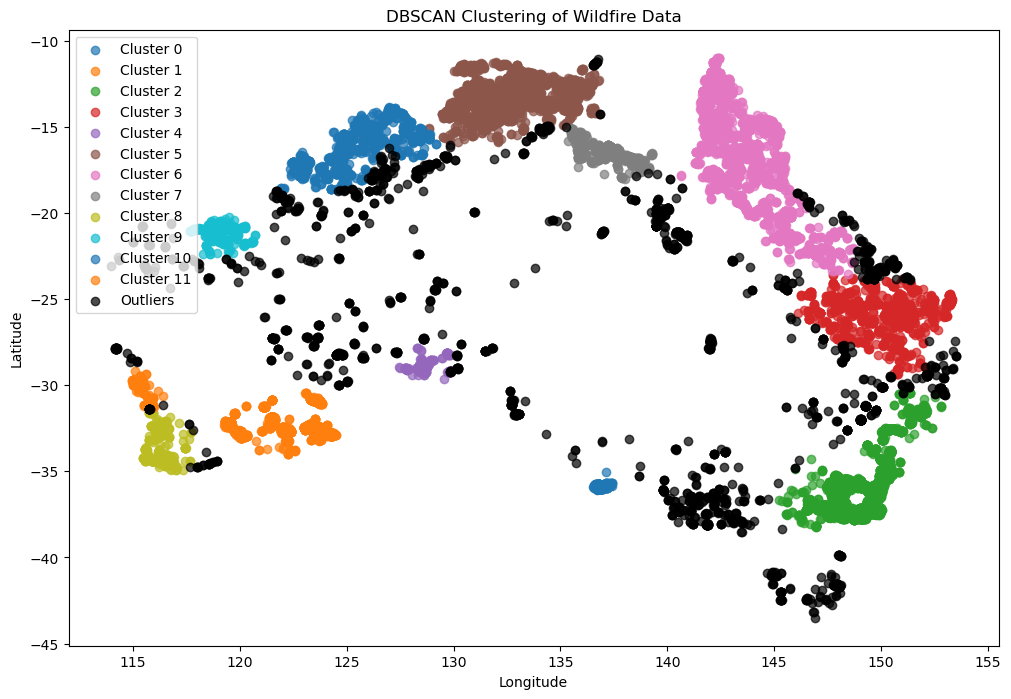

In [128]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/Users/prathameshmandhare/Downloads/wildfire4.csv')

# Extract latitude and longitude columns
X = data[['latitude', 'longitude']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN with adjusted parameters
dbscan = DBSCAN(eps=0.10, min_samples=150)
data['Cluster'] = dbscan.fit_predict(X_scaled)

# Plotting the clusters
plt.figure(figsize=(12, 8))

# Plot each cluster
unique_clusters = set(data['Cluster'])
for cluster in unique_clusters:
    if cluster != -1:  
        cluster_data = data[data['Cluster'] == cluster]
        plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster}', alpha=0.7)

# Plot outliers
outliers_data = data[data['Cluster'] == -1]
plt.scatter(outliers_data['longitude'], outliers_data['latitude'], c='black', label='Outliers', alpha=0.7)

plt.title('DBSCAN Clustering of Wildfire Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [129]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.571994517455247


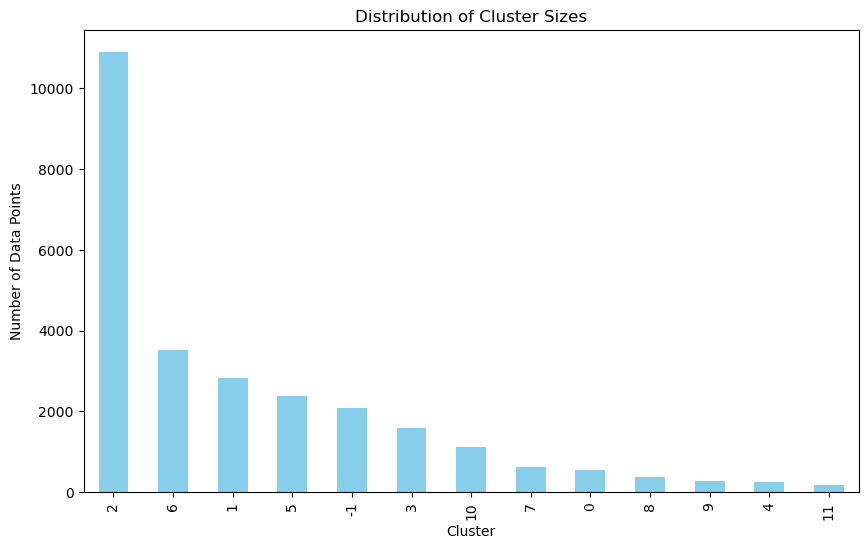

In [131]:
plt.figure(figsize=(10, 6))
cluster_sizes = data['Cluster'].value_counts()
cluster_sizes.plot(kind='bar', color='skyblue')
plt.title('Distribution of Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()



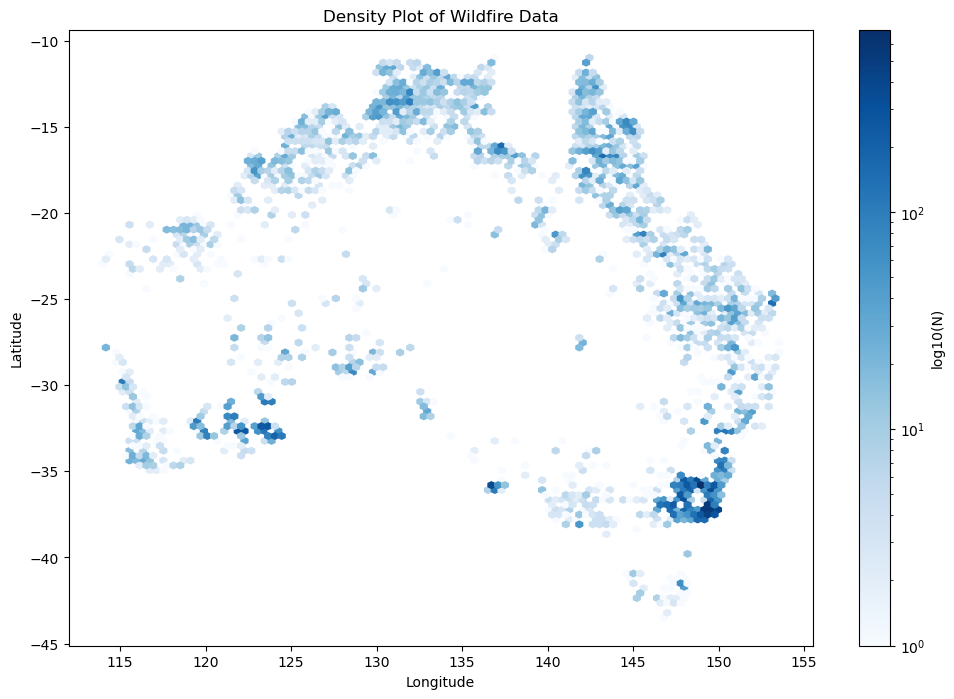

In [132]:
plt.figure(figsize=(12, 8))
plt.hexbin(data['longitude'], data['latitude'], gridsize=100, cmap='Blues', bins='log', mincnt=1)
plt.colorbar(label='log10(N)')
plt.title('Density Plot of Wildfire Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


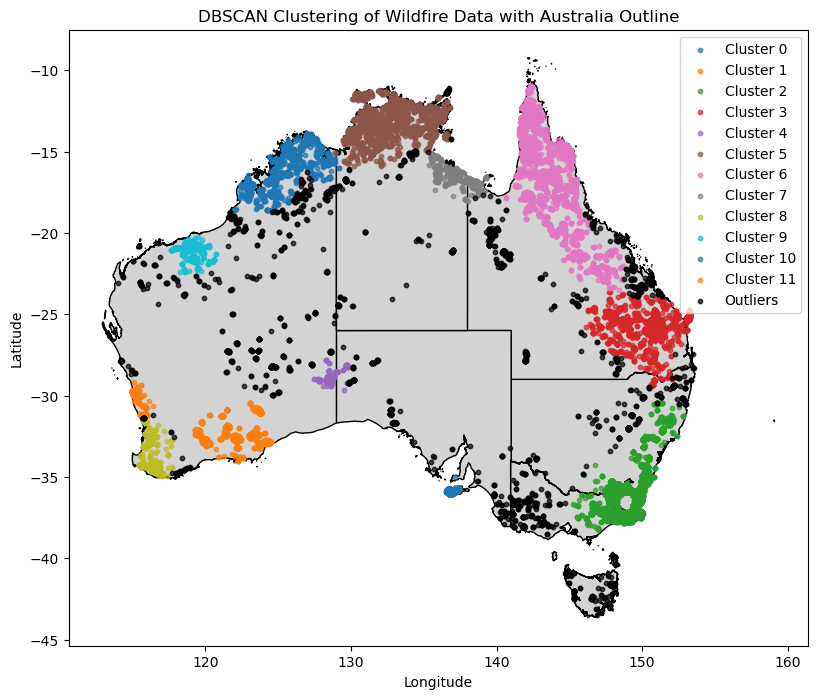

In [135]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

australia_outline = gpd.read_file('/Users/prathameshmandhare/Downloads/states.geojson')

data = pd.read_csv('/Users/prathameshmandhare/Downloads/wildfire4.csv')

X = data[['latitude', 'longitude']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN with adjusted parameters
dbscan = DBSCAN(eps=0.10, min_samples=150)
data['Cluster'] = dbscan.fit_predict(X_scaled)

# Plotting the clusters
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Australia outline
australia_outline.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=1)

# Plot each cluster
unique_clusters = set(data['Cluster'])
for cluster in unique_clusters:
    if cluster != -1:
        cluster_data = data[data['Cluster'] == cluster]
        plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster}', alpha=0.7, s=10)

# Plot outliers
outliers_data = data[data['Cluster'] == -1]
plt.scatter(outliers_data['longitude'], outliers_data['latitude'], c='black', label='Outliers', alpha=0.7, s=10)

plt.title('DBSCAN Clustering of Wildfire Data with Australia Outline')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [136]:
from sklearn.metrics import silhouette_score, silhouette_samples

if len(unique_clusters) > 1:
    silhouette_avg = silhouette_score(X_scaled, data['Cluster'])
    print(f"Silhouette Score for DBSCAN: {silhouette_avg}")

    sample_silhouette_values = silhouette_samples(X_scaled, data['Cluster'])

    y_lower = 10
    for i, cluster in enumerate(unique_clusters):
        if cluster != -1:
            cluster_data = data[data['Cluster'] == cluster]
            cluster_silhouette_values = sample_silhouette_values[data['Cluster'] == cluster]

            cluster_silhouette_values.sort()

            size_cluster_i = len(cluster_silhouette_values)
            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(i) / len(unique_clusters))
            plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(cluster))
            y_lower = y_upper + 10  # 10 for the 0 samples


Silhouette Score for DBSCAN: 0.571994517455247


NameError: name 'np' is not defined